In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import dash
import plotly.graph_objs as go

In [3]:
df = pd.read_csv('./data/transformed/mm_wgi_pe.csv')

In [7]:
df.head()

,country_name,year,region,protestnumber,protesterviolence,participants_category,stateresponse1,start_date,end_date,duration,...,removal of politician,social restrictions,CC.EST,GE.EST,PV.NO.SRC,RL.EST,VA.EST,SI.DST.05TH.20,SI.POV.GINI,SP.POP.TOTL
0,Canada,2006,North America,1,1,3,3,2006-02-21,2006-08-17,178 days,...,0,0,1.962554,1.895545,8.0,1.814535,1.415595,NaN,NaN,32571174.0
1,Canada,2007,North America,1,0,5,4,2007-06-29,2007-06-29,1 days,...,0,0,2.000900,1.761394,8.0,1.814706,1.384672,41.2,33.8,32889025.0
2,Canada,2008,North America,1,1,3,3,2008-08-10,2008-08-10,1 days,...,0,0,2.002689,1.791681,8.0,1.808290,1.407529,NaN,NaN,33247118.0
3,Canada,2009,North America,1,0,7,4,2009-05-13,2009-05-13,1 days,...,0,0,2.061789,1.745890,8.0,1.804082,1.401846,NaN,NaN,33628895.0
4,Canada,2009,North America,2,1,3,1,2009-11-10,2009-11-10,1 days,...,0,0,2.061789,1.745890,8.0,1.804082,1.401846,NaN,NaN,33628895.0


/Users/TJohn/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='start_date', ylabel='CC.EST'>

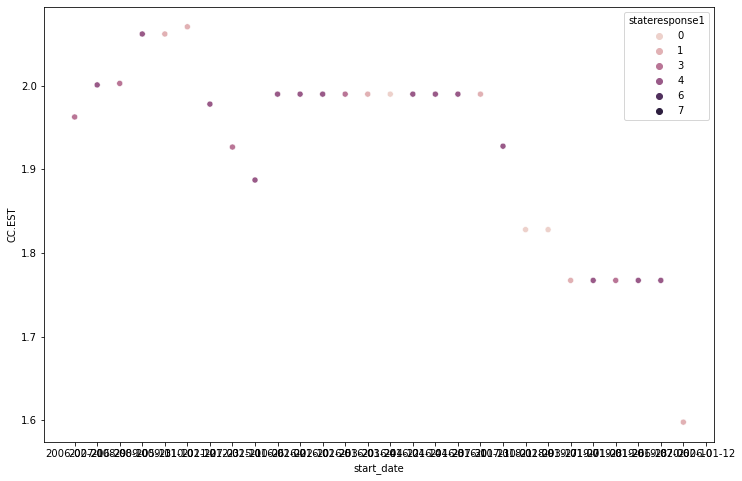

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['start_date'], df[df['country_name']=='Canada']['CC.EST'], hue=df['stateresponse1'])

In [49]:
df_2006['country_name'].unique()

array(['Canada', 'Haiti', 'Jamaica', 'Mexico', 'Guatemala', 'Honduras',
       'El Salvador', 'Nicaragua', 'Panama', 'Colombia', 'Venezuela',
       'Guyana', 'Ecuador', 'Peru', 'Brazil', 'Bolivia', 'Paraguay',
       'Chile', 'Argentina', 'Uruguay', 'United Kingdom', 'Ireland',
       'France', 'Germany', 'Hungary', 'Italy', 'North Macedonia',
       'Slovenia', 'Greece', 'Moldova', 'Romania', 'Russian Federation',
       'Estonia', 'Belarus', 'Armenia', 'Azerbaijan', 'Benin', 'Niger',
       "Cote d'Ivoire", 'Guinea', 'Burkina Faso', 'Liberia',
       'Sierra Leone', 'Togo', 'Nigeria', 'Gabon',
       'Central African Republic', 'Congo, Dem. Rep.', 'Kenya',
       'Ethiopia', 'Angola', 'Zambia', 'Zimbabwe', 'Malawi',
       'South Africa', 'Namibia', 'Botswana', 'Eswatini', 'Madagascar',
       'Comoros', 'Mauritius', 'Iran', 'Turkey', 'Iraq', 'Egypt',
       'Lebanon', 'United Arab Emirates', 'Kyrgyzstan', 'Uzbekistan',
       'Kazakhstan', 'China', 'Mongolia', 'South Korea', 'Japan

In [41]:
df_2006 = df[df['year'] == 2006]

In [47]:
data = {
    'type' : 'choropleth',
    'locations' : df_2006['country_name'],
    'locationmode':'country names',
    'colorscale' : 'viridis',
    'z':df_2006['GE.EST']}

In [48]:
map = go.Figure(data=[data])
plotly.offline.plot(map)

'temp-plot.html'